# IPL WINNING TEAM PREDICTION

In [156]:
import pandas as pd
import numpy as np

## Importing the dataset

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
df = pd.read_csv('/content/drive/My Drive/Internship Projects/InterPe Projects/Project 3/ipl_colab.csv')
print("Original Dataset Shape:", df.shape)

Original Dataset Shape: (76014, 15)


## Let's have a look on first 5 rows

In [159]:
df.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## Let's describe the numerical values of the dataset

In [160]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


## Let's see whether any column contain null values or missing values

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


## Let's count the unique values present in each column

In [162]:
df.nunique()

,0
mid,617
date,442
venue,35
batting_team,14
bowling_team,14
batsman,411
bowler,329
runs,252
wickets,11
overs,140


## Now, let's perform data cleaning

### Firstly , let's remove the irrelevant columns

In [163]:
irrelevant_columns = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
df = df.drop(irrelevant_columns, axis=1)

In [164]:
df.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


### Keeping only Consistent Teams (teams that never change even in current season)

In [165]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore','Delhi Daredevils', 'Sunrisers Hyderabad']
df = df[(df['batting_team'].isin(consistent_teams)) & (df['bowling_team'].isin(consistent_teams))]

In [166]:
df.shape

(53811, 8)

### Removing First 5 Overs of every match

In [167]:
df = df[df['overs'] >= 5.0]
df.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [168]:
df.shape

(40108, 8)

### Data Preprocessing and Encoding

#### Performing Label Encoding

In [169]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
  df[col] = le.fit_transform(df[col])
df.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


### Performing One Hot Encoding and Column Transformation

In [170]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),[0, 1])],  remainder='passthrough')

In [171]:
df = np.array(columnTransformer.fit_transform(df))

### Saving this Numpy Array in a new DataFrame with transformed columns

In [172]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(df, columns=cols)

In [173]:
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


## Preparing Train and Test Splits

In [174]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [175]:
# Performing 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


## Training and Testing on different Machine Learning Algorithms to choose the best algorithm

In [176]:
# Keeping track of model perfomances
models = dict()

## 1. Decision Tree Regressor

In [177]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

### Evaluating the Model

In [178]:
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.99%
Test Score : 85.83%


In [179]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 3.980615806532037
Mean Squared Error (MSE): 125.66389304412864
Root Mean Squared Error (RMSE): 11.209990769136638


## 2. Linear Regression

In [180]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

###  Evaluating the Model

In [181]:
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 65.99%
Test Score : 65.62%


In [182]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.112410435179777
Mean Squared Error (MSE): 305.0563257623772
Root Mean Squared Error (RMSE): 17.465861724013998


### 3. Random Forest Regression

In [183]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
# Train Model
random_forest.fit(train_features, train_labels)

RandomForestRegressor()

###  Evaluating the Model

In [184]:
train_score_forest = str(random_forest.score(train_features, train_labels)*100)
test_score_forest = str(random_forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["random_forest"] = test_score_forest

Train Score : 99.07%
Test Score : 93.57%


In [185]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, random_forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, random_forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, random_forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.398791178425996
Mean Squared Error (MSE): 56.99923941594296
Root Mean Squared Error (RMSE): 7.549784064193026


### 4. Lasso Regression

In [186]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
# Train Model
lasso.fit(train_features, train_labels)

LassoCV()

### Evaluating the Model

In [187]:
train_score_lasso = str(lasso.score(train_features, train_labels)*100)
test_score_lasso = str(lasso.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_lasso[:5]}%\nTest Score : {test_score_lasso[:5]}%')
models["lasso"] = test_score_lasso

Train Score : 64.95%
Test Score : 64.93%


In [188]:
print("---- Lasso Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, lasso.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, lasso.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, lasso.predict(test_features)))))

---- Lasso Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.093065567932516
Mean Squared Error (MSE): 311.1276056545018
Root Mean Squared Error (RMSE): 17.638809643921604


### 5. Support Vector Machine

In [189]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [190]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm

Train Score : 57.41%
Test Score : 57.39%


In [191]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.635093385154384
Mean Squared Error (MSE): 378.08184639617673
Root Mean Squared Error (RMSE): 19.444326843482568


### 6. Neural Networks

In [155]:
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(activation='logistic', max_iter=500)
# Train Model
neural_net.fit(train_features, train_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', max_iter=500)

In [192]:
train_score_neural_net = str(neural_net.score(train_features, train_labels)*100)
test_score_neural_net = str(neural_net.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_neural_net[:5]}%\nTest Score : {test_score_neural_net[:5]}%')
models["neural_net"] = test_score_neural_net

Train Score : 85.45%
Test Score : 85.99%


In [193]:
print("---- Neural Networks Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, neural_net.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, neural_net.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, neural_net.predict(test_features)))))

---- Neural Networks Regression - Model Evaluation ----
Mean Absolute Error (MAE): 7.978030236608694
Mean Squared Error (MSE): 124.29835286278254
Root Mean Squared Error (RMSE): 11.148917116150004


# Best Model Selection

<Axes: >

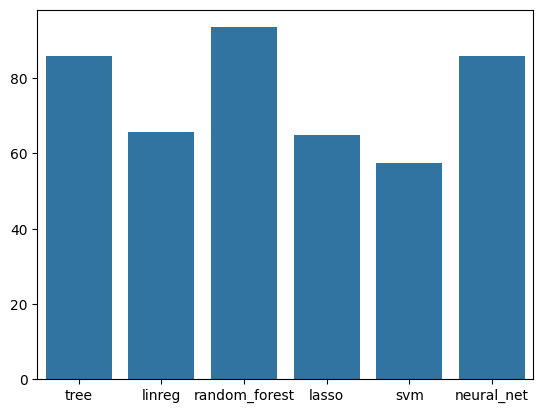

In [194]:
import seaborn as sns
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
sns.barplot(x=model_names, y=accuracy)

## From above, we can see that Random Forest performed the best, closely followed by Decision Tree and Neural Networks. So we will be choosing Random Forest for the final model

### Predictions

In [202]:
def predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

## Test 1
Batting Team : Delhi Daredevils
<br>
Bowling Team : Chennai Super Kings
<br>
Final Score : 147/9

In [203]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = predict_score(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 149 || Actual Score : 147


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Test 2
Batting Team : Mumbai Indians
<br>
Bowling Team : Kings XI Punjab
<br>
Final Score : 176/7

In [204]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = predict_score(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 190 || Actual Score : 176


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Live* Test 1 (2020 season)

Batting Team : Kings XI Punjab
<br>
Bowling Team : Rajasthan Royals
<br>
Final Score : 185/4
<br>
These Test Was done before the match and final score were added later.

In [205]:
# Live Test
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score = predict_score(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 184 || Actual Score : 185


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Live Test 2 (2020 Season)
Batting Team : Kolkata Knight Riders
<br>
Bowling Team : Chennai Super Kings
<br>
Final Score : 172/5

In [206]:
# Live Test
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = predict_score(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 174 || Actual Score : 172


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Live Test 3 (2020 Season)
Batting Team : Delhi Daredevils
<br>
Bowling Team : Mumbai Indians
<br>
Final Score : 110/7

In [207]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = predict_score(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 107 || Actual Score : 110


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Live Test 4 (2020 Season)
Batting Team : Kings XI Punjab
<br>
Bowling Team : Chennai Super Kings
<br>
Final Score : 153/9

In [208]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = predict_score(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 147 || Actual Score : 153


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
